Equipe:

- Arthur Abrahão Santos Barbosa
- Lucca Andrade Limongi Di Francesco
- Marco Antonio Sena Correia de Araujo
- Matheus Isidoro Gomes Batista

# Bibliotecas Usadas

In [1]:
import pandas as pd
import os
from os.path import exists 
from os import environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import pickle

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier



In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# !pip install scikit-plot
# !python /content/drive/MyDrive/neural-networks/project_metrics/project_metrics.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Separando os Dados

In [ ]:
DATASET_EXISTS = exists("TRNcod.xls")

## Carregando o Dataset

In [ ]:
if DATASET_EXISTS:
    df = pd.read_csv("TRNcod.xls",sep="\t")
    print(f"DATAFRAME SIZE: {len(df)}")

In [ ]:
if DATASET_EXISTS:
    df.describe()

In [ ]:
if DATASET_EXISTS:
    df.head()

In [ ]:
if DATASET_EXISTS:
    df.tail()

## Separando o Dataframe em Classes

In [ ]:
if DATASET_EXISTS:
    df_1_1=df[df["IND_BOM_1_1"]==1]
    df_1_2=df[df["IND_BOM_1_2"]==1]
    print("DATAFRAME SIZE:")
    print(f"IND_BOM_1_1: {len(df_1_1)}")
    print(f"IND_BOM_1_2: {len(df_1_2)}")

## Aleatorizando o Dataframe

In [ ]:
if DATASET_EXISTS:
    df_1_1=df_1_1.sample(frac=1, random_state=1).reset_index(drop=True)
    df_1_2=df_1_2.sample(frac=1, random_state=1).reset_index(drop=True)

## Separando os Dados em Treino validação e teste

### IND_BOM_1_1

In [ ]:
if DATASET_EXISTS:
    df_1_1_train = df_1_1.sample(frac=0.5)
    df_1_1 = df_1_1.drop(df_1_1_train.index)
    df_1_1_val = df_1_1.sample(frac=0.5)
    df_1_1_test = df_1_1.drop(df_1_1_val.index)

    df_1_1_train = df_1_1_train.reset_index(drop=True)
    df_1_1_val = df_1_1_val.reset_index(drop=True)
    df_1_1_test = df_1_1_test.reset_index(drop=True)

    print("DATAFRAME SIZE:")
    print(f"TRAIN DATA: {len(df_1_1_train)}")
    print(f"VALIDATION DATA: {len(df_1_1_val)}")
    print(f"TEST DATA: {len(df_1_1_test)}")

### IND_BOM_1_2

In [ ]:
if DATASET_EXISTS:
    df_1_2_train = df_1_2.sample(frac=0.5)
    df_1_2 = df_1_2.drop(df_1_2_train.index)
    df_1_2_val = df_1_2.sample(frac=0.5)
    df_1_2_test = df_1_2.drop(df_1_2_val.index)

    df_1_2_train = df_1_2_train.reset_index(drop=True)
    df_1_2_val = df_1_2_val.reset_index(drop=True)
    df_1_2_test = df_1_2_test.reset_index(drop=True)

    print("DATAFRAME SIZE:")
    print(f"TRAIN DATA: {len(df_1_2_train)}")
    print(f"VALIDATION DATA: {len(df_1_2_val)}")
    print(f"TEST DATA: {len(df_1_2_test)}")

## Concatenando o Dataset com a Classe Minoritária com Suas Primeiras Linhas

In [ ]:
if DATASET_EXISTS:
    df_1_2_train = pd.concat((df_1_2_train, df_1_2_train.iloc[:len(df_1_1_train)-len(df_1_2_train)]), axis = 0)
    df_1_2_val = pd.concat((df_1_2_val, df_1_2_val.iloc[:len(df_1_1_val)-len(df_1_2_val)]), axis = 0)

    print("DATAFRAME SIZE:")
    print(f"TRAIN DATA: {len(df_1_2_train)}")
    print(f"VALIDATION DATA: {len(df_1_2_val)}")
    print(f"TEST DATA: {len(df_1_2_test)}")

## Juntando os Datasets Contendo Ambas as Classes

In [ ]:
if DATASET_EXISTS:
    train_data = pd.concat((df_1_1_train, df_1_2_train), axis = 0)
    val_data = pd.concat((df_1_1_val, df_1_2_val), axis = 0)
    test_data = pd.concat((df_1_1_test, df_1_2_test), axis = 0)

    train_data = train_data.sample(frac=1, random_state=1).reset_index(drop=True)
    val_data = val_data.sample(frac=1, random_state=1).reset_index(drop=True)
    test_data = test_data.sample(frac=1, random_state=1).reset_index(drop=True)

    print("DATAFRAME SIZE:")
    print(f"TRAIN DATA: {len(train_data)}")
    print(f"VALIDATION DATA: {len(val_data)}")
    print(f"TEST DATA: {len(test_data)}")

## Checando se Os Passos Foram Executados Corretamente

### Checando por Interseção Entre os Dados

In [ ]:
if DATASET_EXISTS:
    train_index = set(train_data["INDEX"])
    val_index = set(val_data["INDEX"])
    test_index = set(test_data["INDEX"])

    print("DATAFRAME SIZE:")
    print(f"TRAIN DATA: {len(df_1_2_train)}")
    print(f"VALIDATION DATA: {len(df_1_2_val)}")
    print(f"TEST DATA: {len(df_1_2_test)}")

In [ ]:
if DATASET_EXISTS:
    train_val_intersection = train_index.intersection(val_index)
    train_test_intersection = train_index.intersection(test_index)
    val_test_intersection = val_index.intersection(test_index)

    assert not train_val_intersection, f"Intersection {train_val_intersection} found between train and validation datasets!"
    assert not train_test_intersection, f"Intersection {train_test_intersection} found between train and test datasets!"
    assert not train_test_intersection, f"Intersection {val_test_intersection} found between validation and test datasets!"

### Checando se Ambas as Classes Possuem a Mesma Quantidade de Dados

In [ ]:
if DATASET_EXISTS:
    assert len(train_data[train_data["IND_BOM_1_1"]==1]) == len(train_data[train_data["IND_BOM_1_2"]==1]), "Train data classes have mismatching sizes!"
    assert len(val_data[val_data["IND_BOM_1_1"]==1]) == len(val_data[val_data["IND_BOM_1_2"]==1]), "Validation data classes have mismatching sizes!"

## Salvando Dados para Arquivo CSV

In [ ]:
ASSETS_FOLDER = "Assets"
TRAIN_DATA_CSV = f"{ASSETS_FOLDER}/train.csv"
VAL_DATA_CSV = f"{ASSETS_FOLDER}/val.csv"
TEST_DATA_CSV = f"{ASSETS_FOLDER}/train.csv"

if not (exists(TRAIN_DATA_CSV) and exists(VAL_DATA_CSV) and exists(TEST_DATA_CSV)):
    train_data.to_csv(TRAIN_DATA_CSV)
    val_data.to_csv(VAL_DATA_CSV)
    test_data.to_csv(TEST_DATA_CSV)

# Carregando os dados que Foram Previamente Separados

In [8]:
df_train = pd.read_csv("Assets/train.csv")
df_val= pd.read_csv("Assets/val.csv")
df_test = pd.read_csv("Assets/test.csv")

# df_train = pd.read_csv("/content/drive/MyDrive/neural-networks/Assets/train.csv")
# df_val= pd.read_csv("/content/drive/MyDrive/neural-networks/Assets/val.csv")
# df_test = pd.read_csv("/content/drive/MyDrive/neural-networks/Assets/test.csv")

df_train.drop("INDEX", inplace=True, axis =1)
df_val.drop("INDEX", inplace=True, axis =1)
df_test.drop("INDEX", inplace=True, axis =1)

df_train.drop("Unnamed: 0", inplace=True, axis =1)
df_val.drop("Unnamed: 0", inplace=True, axis =1)
df_test.drop("Unnamed: 0", inplace=True, axis =1)

df_train.drop("IND_BOM_1_2", inplace=True, axis =1)
df_val.drop("IND_BOM_1_2", inplace=True, axis =1)
df_test.drop("IND_BOM_1_2", inplace=True, axis =1)

y_train = df_train["IND_BOM_1_1"].values
y_val = df_val["IND_BOM_1_1"].values
y_test = df_test["IND_BOM_1_1"].values

df_train.drop("IND_BOM_1_1", inplace=True, axis =1)
df_val.drop("IND_BOM_1_1", inplace=True, axis =1)
df_test.drop("IND_BOM_1_1", inplace=True, axis =1)

x_train = df_train.values
x_val = df_val.values
x_test = df_test.values

x_train.shape

(255098, 243)

# Métricas

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.callbacks import History

import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

CLASSES = ["0", "1"]

# Essas funções foram baseadas em: https://github.com/RomeroBarata/IF702-redes-neurais/blob/master/main.ipynb
class Metrics():
    def extract_final_losses(self,history:dict):
        """Função para extrair o melhor loss de treino e validação.
        
        Argumento(s):
        history -- Objeto retornado pela função fit do keras.
        
        Retorno:
        Dicionário contendo o melhor loss de treino e de validação baseado 
        no menor loss de validação.
        """
        train_loss = history['loss']
        val_loss = history['val_loss']
        idx_min_val_loss = np.argmin(val_loss)
        return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

    def plot_training_error_curves(self, history:History):
        """Função para plotar as curvas de erro do treinamento da rede neural.
        
        Argumento(s):
        history -- Objeto retornado pela função fit do keras.
        
        Retorno:
        A função gera o gráfico do treino da rede e retorna None.
        """
        train_loss = history['loss']
        val_loss = history['val_loss']
        
        fig, ax = plt.subplots()
        ax.plot(train_loss, label='Train')
        ax.plot(val_loss, label='Validation')
        ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
        ax.legend()
        plt.show()

    def compute_performance_metrics(self, y, y_pred_class, y_pred_scores=None):
        accuracy = accuracy_score(y, y_pred_class)
        recall = recall_score(y, y_pred_class)
        precision = precision_score(y, y_pred_class)
        f1 = f1_score(y, y_pred_class)
        performance_metrics = (accuracy, recall, precision, f1)
        if y_pred_scores is not None:
            skplt.metrics.plot_ks_statistic(y, y_pred_scores)
            plt.show()
            y_pred_scores = y_pred_scores[:, 1]
            auroc = roc_auc_score(y, y_pred_scores)
            aupr = average_precision_score(y, y_pred_scores)
            performance_metrics = performance_metrics + (auroc, aupr)
        return performance_metrics

    def print_metrics_summary(self, accuracy, recall, precision, f1, auroc=None, aupr=None):
        print()
        print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
        print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
        print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
        print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
        if auroc is not None:
            print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
        if aupr is not None:
            print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))


    # def get_data(network, test_data):
    #     results = [(np.argmax(network.feedforward(x)), y) for (x, y) in test_data]
    #     y_true = [i for i,_ in results]
    #     y_pred = [j for _,j in results]
    #     return y_true,y_pred


    def plot_confusion_matrix(self, y_true, y_pred, fontsize = 20):
        """
        This function was based on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
        """
        #y_true,y_pred = get_data(network, test_data)
        cf_matrix = confusion_matrix(y_true,y_pred)
        group_names = ["True Neg","False Pos","False Neg","True Pos"]
        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        s = sns.heatmap(cf_matrix, annot=labels, fmt="")
        # plt.figure(figsize = figsize)
        # plt.title(title,fontsize = fontsize + int(0.5*fontsize))
        # s = sns.heatmap(cm, annot = True, xticklabels = classes, yticklabels = classes,fmt = fmt)
        s.set_xlabel('Predicted Label',fontsize = fontsize)
        s.set_ylabel('True Label', fontsize = fontsize)
        #plt.show()

    def print_classification_report(self, y_true,y_pred, classes=CLASSES):
        # y_true,y_pred = get_data(network, test_data)
        print(classification_report(y_true,y_pred,target_names=classes))
    
metrics = Metrics()

# Algoritmos de Aprendizado de Máquina

## MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

MODELS_PATH = "Models/MLP"
HISTORY_PATH = f"{MODELS_PATH}/history"
MODEL_PATH = f"{MODELS_PATH}/model"

### Experimento1

In [ ]:

input_dim = x_train.shape[1]

classifier = Sequential()

classifier.add(Dense(16, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "1.npy"
model_file = MODEL_PATH + "1"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=10,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 2s 601us/step
Matriz de confusão no conjunto de teste:

Train Loss:       0.2187
Validation Loss:  0.2214

Performance no conjunto de teste:


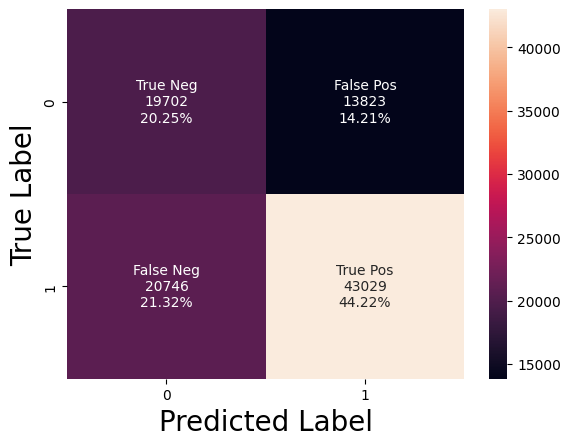

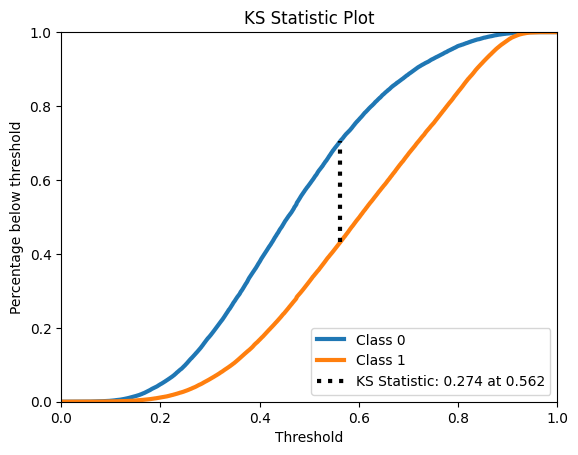


Accuracy:         0.6447
Recall:           0.6747
Precision:        0.7569
F1:               0.7134
AUROC:            0.6887
AUPR:             0.8014


In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

In [ ]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(256, activation='relu', input_dim=input_dim))
classifier.add(Dense(128, activation='relu', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "2.npy"
model_file = MODEL_PATH + "2"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=10_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 2s 720us/step
Matriz de confusão no conjunto de teste:

Train Loss:       0.2206
Validation Loss:  0.2213

Performance no conjunto de teste:


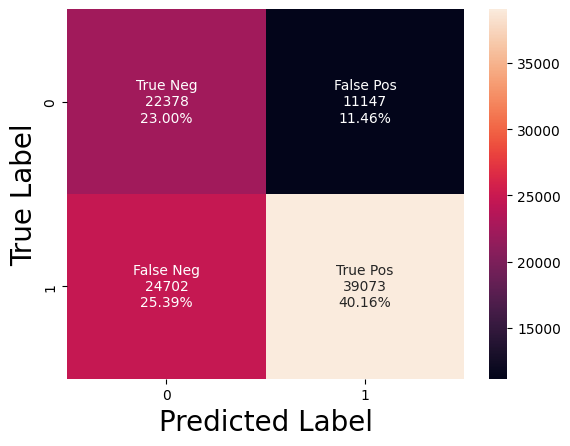

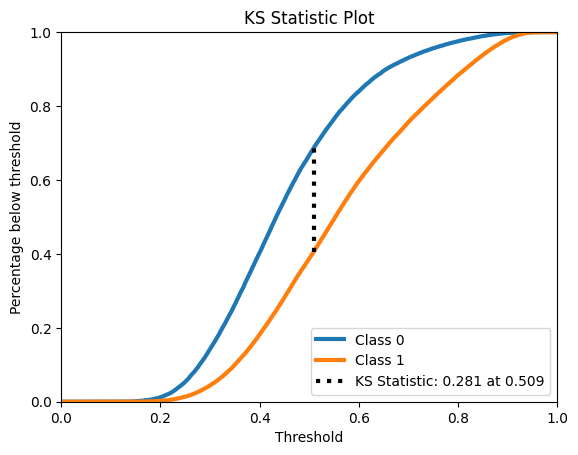


Accuracy:         0.6316
Recall:           0.6127
Precision:        0.7780
F1:               0.6855
AUROC:            0.6921
AUPR:             0.8042


In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento3

In [ ]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(256, activation='sigmoid', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "3.npy"
model_file = MODEL_PATH + "3"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 1ms/step
Matriz de confusão no conjunto de teste:

Train Loss:       0.2258
Validation Loss:  0.2255

Performance no conjunto de teste:


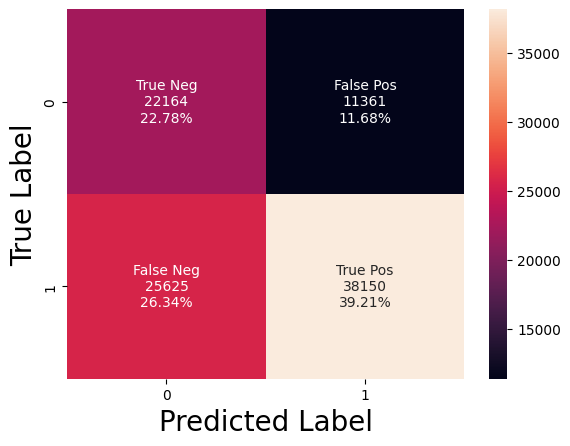

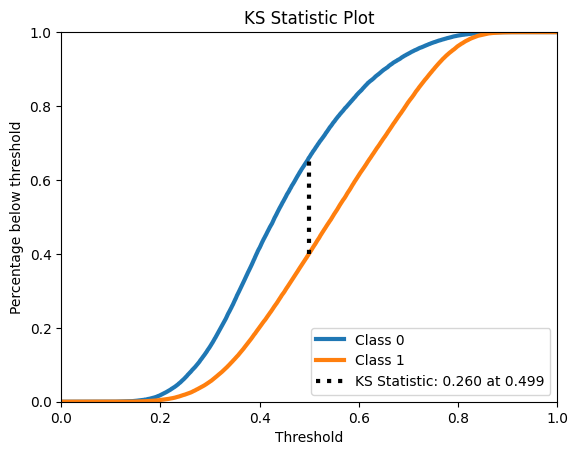


Accuracy:         0.6199
Recall:           0.5982
Precision:        0.7705
F1:               0.6735
AUROC:            0.6774
AUPR:             0.7885


In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento4

In [ ]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(512, activation='tanh', input_dim=input_dim))
classifier.add(Dense(256, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))

optimizer=keras.optimizers.SGD( learning_rate=0.01)
classifier.compile(optimizer=optimizer, loss='mean_squared_error')

history_file = HISTORY_PATH + "4.npy"
model_file = MODEL_PATH + "4"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1,restore_best_weights=True)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 941us/step
Matriz de confusão no conjunto de teste:

Train Loss:       0.2174
Validation Loss:  0.2212

Performance no conjunto de teste:


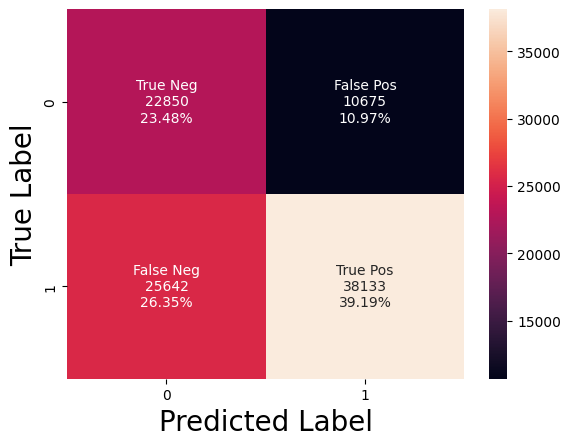

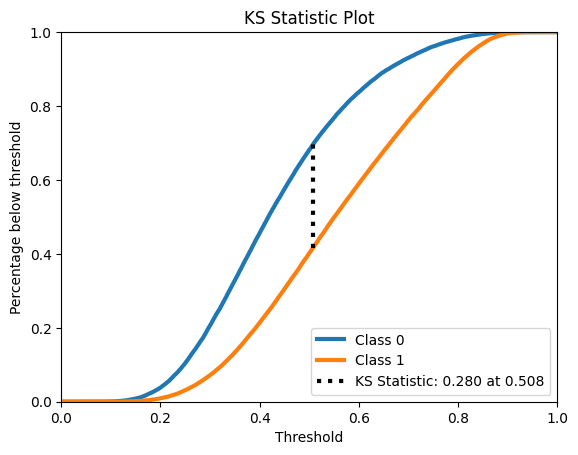


Accuracy:         0.6268
Recall:           0.5979
Precision:        0.7813
F1:               0.6774
AUROC:            0.6925
AUPR:             0.8028


In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento5

In [ ]:
# Número de features do nosso data set.
input_dim = x_train.shape[1]

# Aqui criamos o esboço da rede.
classifier = Sequential()

classifier.add(Dense(1024, activation='tanh', input_dim=input_dim))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='mean_squared_error')

history_file = HISTORY_PATH + "5.npy"
model_file = MODEL_PATH + "5"

if not exists(history_file) or  not exists(model_file):
    history = classifier.fit(x_train, y_train, batch_size=32, epochs=1_000, callbacks=[EarlyStopping(patience=20,verbose=1)], validation_data=(x_val, y_val))
    np.save(history_file,history.history)
    classifier.save(model_file)
else:
    print("Model was already trained")
    
history=np.load(history_file, allow_pickle='TRUE').item()
classifier = keras.models.load_model(model_file)

Model was already trained


3041/3041 [==============================] - 3s 973us/step
Matriz de confusão no conjunto de teste:

Train Loss:       0.2259
Validation Loss:  0.2234

Performance no conjunto de teste:


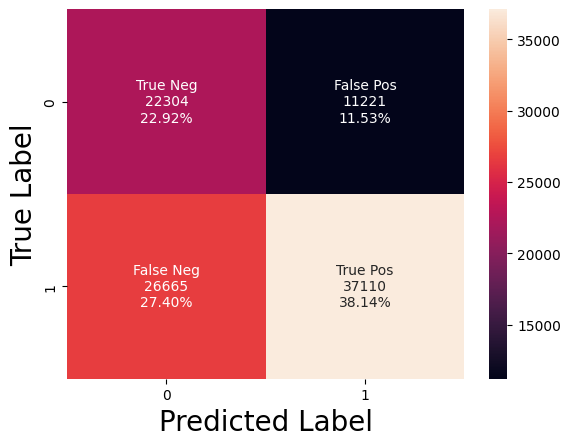

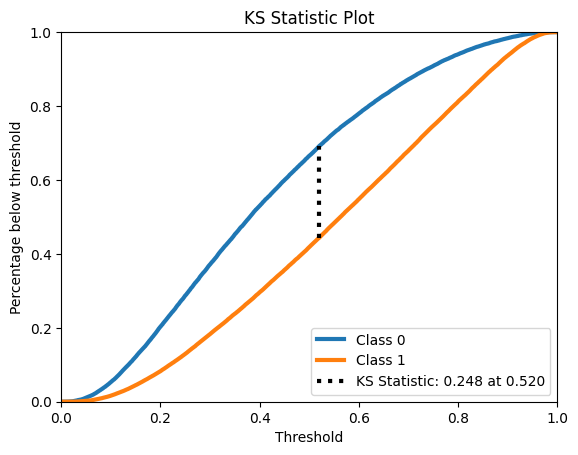


Accuracy:         0.6106
Recall:           0.5819
Precision:        0.7678
F1:               0.6621
AUROC:            0.6690
AUPR:             0.7847


In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = (y_pred_scores > 0.5).astype("int32")
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## MLP Ensemble

In [ ]:
MLP_ENS_PATH = "Models/MLP_ENS"
MLP_MODEL_ENS_PATH = f"{MLP_ENS_PATH}/model"

### Experimento1

In [ ]:
mlp = MLPClassifier(verbose=True)
mlp1 = MLPClassifier(verbose=True)
mlp2 = MLPClassifier(verbose=True)

model_file = MLP_MODEL_ENS_PATH+"1"
if not exists(model_file):
    mlp_ns = mlp.fit(x_train,y_train)
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp1)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(MLP_MODEL_ENS_PATH+"1", 'wb') as file:
        pickle.dump(mlp_ens,file)
    with open(MLP_MODEL_ENS_PATH+"ns"+"1", 'wb') as file:
        pickle.dump(mlp_ns,file)
else:
    print("Model was already trained")
    with open(MLP_MODEL_ENS_PATH+"1", 'rb') as file:
        mlp_ens = pickle.load(file)
    with open(MLP_MODEL_ENS_PATH+"ns"+"1", 'rb') as file:
        mlp_ns= pickle.load(file)

Model was already trained


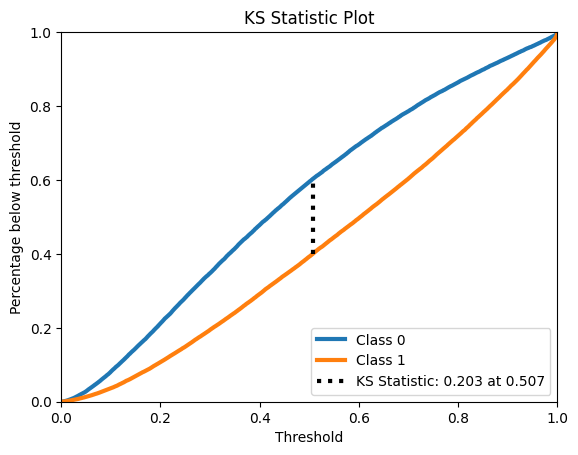

Performance no conjunto de validação:

Accuracy:         0.6031
Recall:           0.6074
Precision:        0.7405
F1:               0.6674
AUROC:            0.6362
AUPR:             0.7523


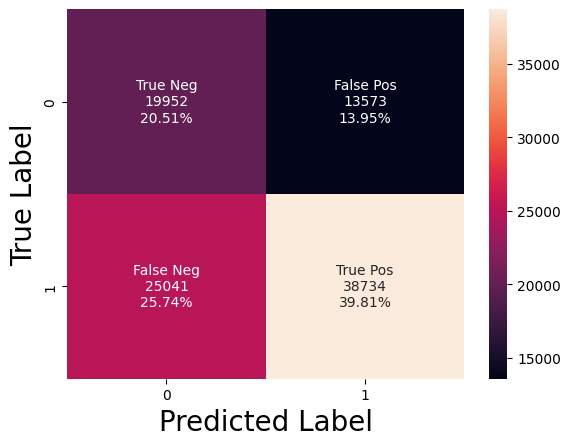

In [ ]:
mlp_pred_class = mlp_ns.predict(x_test)
mlp_pred_scores = mlp_ns.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, mlp_pred_class)

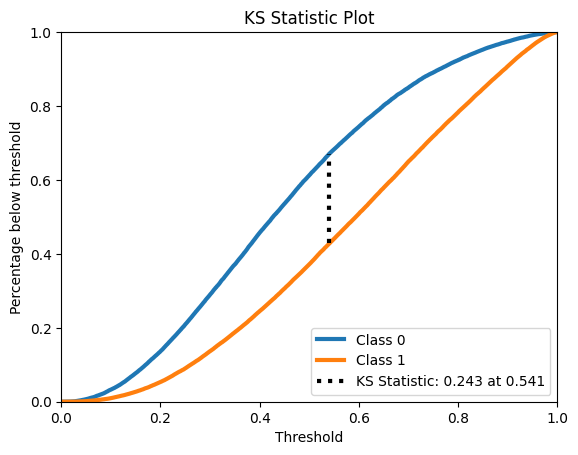

Performance no conjunto de validação:

Accuracy:         0.6231
Recall:           0.6285
Precision:        0.7554
F1:               0.6861
AUROC:            0.6652
AUPR:             0.7821


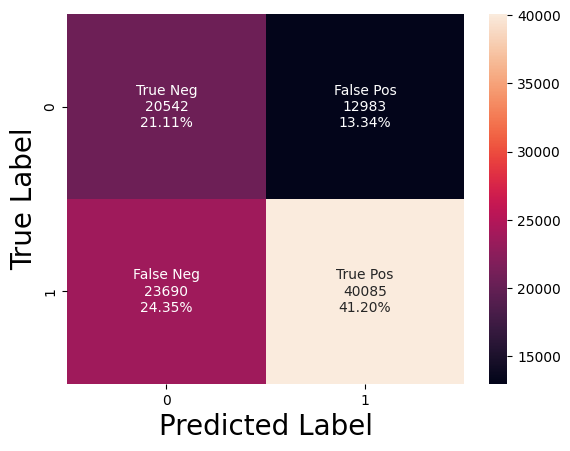

In [ ]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, mlp_pred_class)

### Experimento2

In [ ]:
mlp1 = MLPClassifier(activation="relu",verbose=True)
mlp2 = MLPClassifier(activation="logistic", verbose=True)
mlp3 = MLPClassifier(activation="tanh", verbose=True)

model_file = MLP_MODEL_ENS_PATH+"2"
if not exists(model_file):
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)

Model was already trained


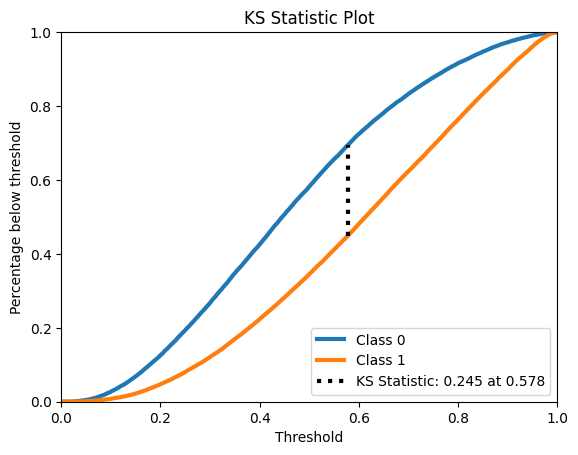

Performance no conjunto de validação:

Accuracy:         0.6299
Recall:           0.6550
Precision:        0.7489
F1:               0.6988
AUROC:            0.6665
AUPR:             0.7825


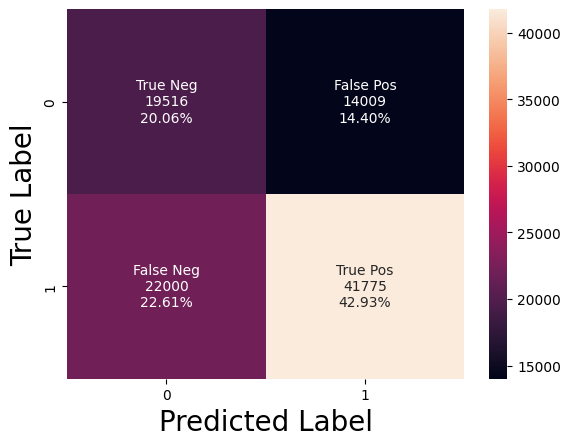

In [ ]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, mlp_pred_class)

### Experimento3

In [ ]:
mlp1 = MLPClassifier(solver="lbfgs",verbose=True)
mlp2 = MLPClassifier(solver="sgd", verbose=True)
mlp3 = MLPClassifier(solver="adam", verbose=True)

model_file = MLP_MODEL_ENS_PATH+"3"
if not exists(model_file):
    mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)

Model was already trained


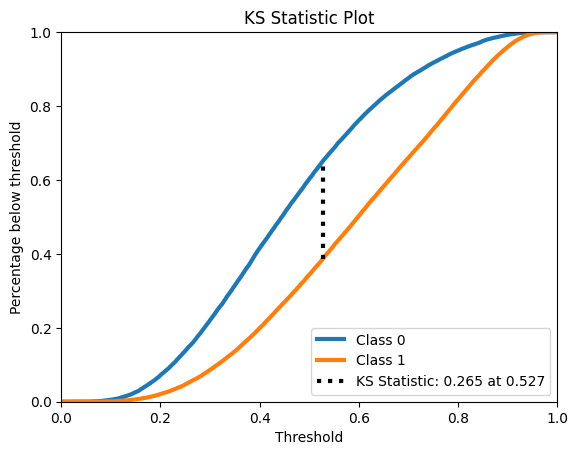

Performance no conjunto de validação:

Accuracy:         0.6378
Recall:           0.6562
Precision:        0.7586
F1:               0.7037
AUROC:            0.6820
AUPR:             0.7963


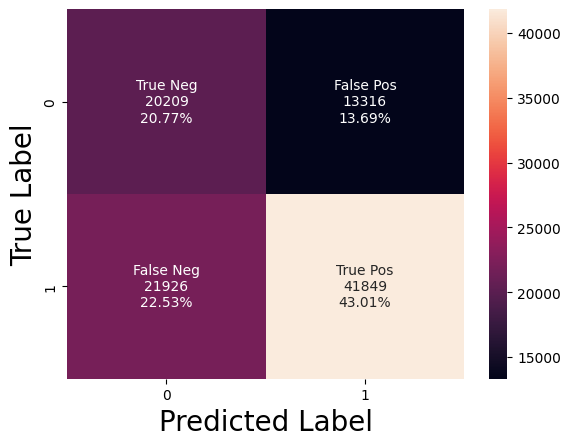

In [ ]:
mlp_pred_class = mlp_ens.predict(x_test)
mlp_pred_scores = mlp_ens.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, mlp_pred_class)

### Experimento4

In [ ]:
# mlp1 = MLPClassifier(hidden_layer_size=(16,), activation="relu", solver="adam", verbose=True)
# mlp2 = MLPClassifier(hidden_layer_size=(64,32), activation="tanh", solver="sgd", verbose=True)
# mlp3 = MLPClassifier(activation="logistic", solver="sgd", verbose=True)

# model_file = MLP_MODEL_ENS_PATH+"4"
# if not exists(model_file):
#     mlp_ens = VotingClassifier([('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')
#     mlp_ens.fit(x_train,y_train)
#     with open(model_file, 'wb') as file:
#         pickle.dump(mlp_ens,file)
# else:
#     print("Model was already trained")
#     with open(model_file, 'rb') as file:
#         mlp_ens = pickle.load(file)

In [ ]:
# mlp_pred_class = mlp_ens.predict(x_test)
# mlp_pred_scores = mlp_ens.predict_proba(x_test)
# accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_pred_class, mlp_pred_scores)
# print('Performance no conjunto de validação:')
# metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

## Gradient Boosting

In [ ]:
GB_PATH = "Models/GB"
GB_MODEL_PATH = f"{GB_PATH}/model"

### Experimento1

Model was already trained


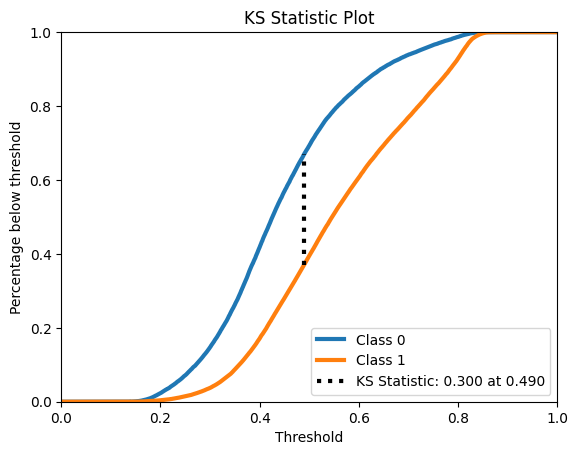


Accuracy:         0.6354
Recall:           0.6049
Precision:        0.7896
F1:               0.6850
AUROC:            0.7054
AUPR:             0.8101


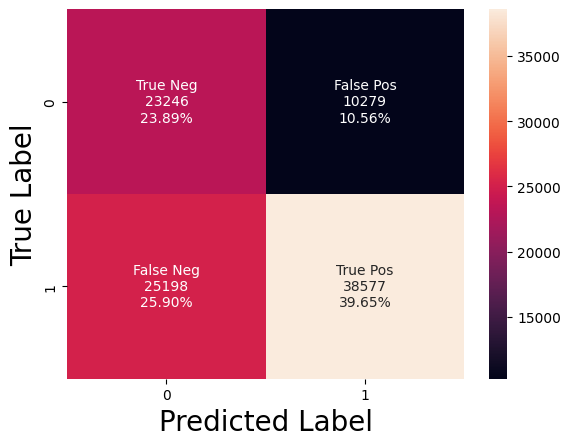

In [ ]:
gb_clf = GradientBoostingClassifier()  

model_file = GB_MODEL_PATH+"1"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)
        
gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento2

Model was already trained


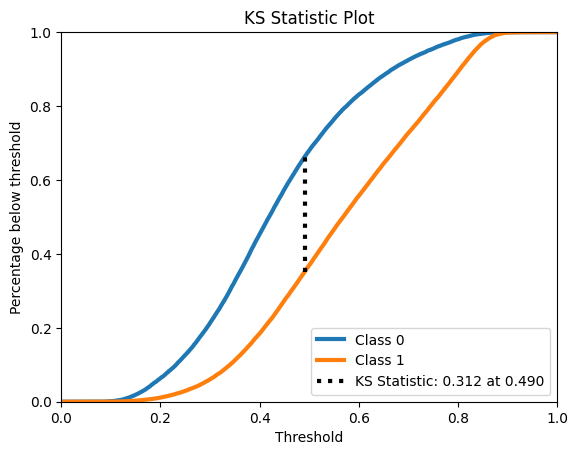


Accuracy:         0.6475
Recall:           0.6302
Precision:        0.7895
F1:               0.7009
AUROC:            0.7130
AUPR:             0.8162


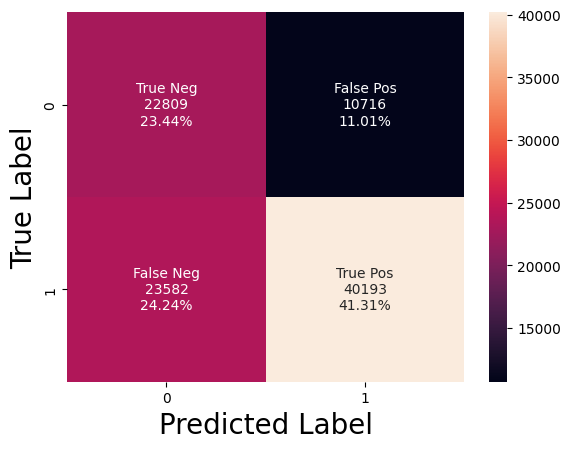

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=500)  

model_file = GB_MODEL_PATH+"2"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento3

Model was already trained


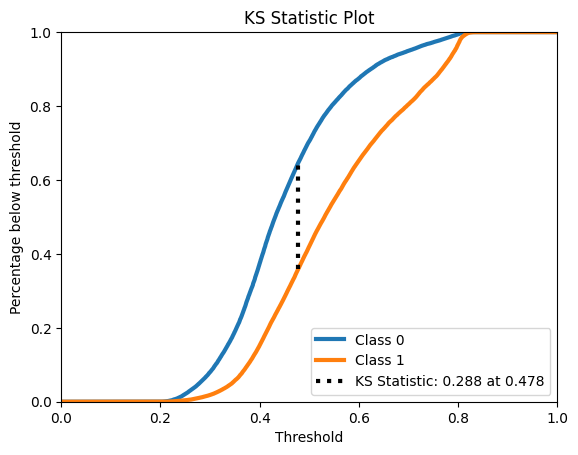


Accuracy:         0.6227
Recall:           0.5794
Precision:        0.7889
F1:               0.6681
AUROC:            0.6982
AUPR:             0.8054


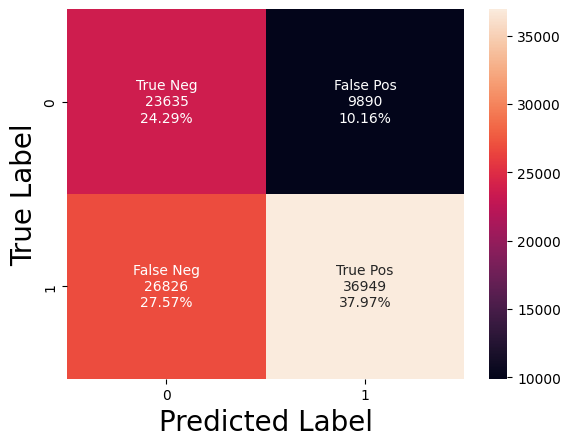

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=50)

model_file = GB_MODEL_PATH+"3"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento4

Model was already trained


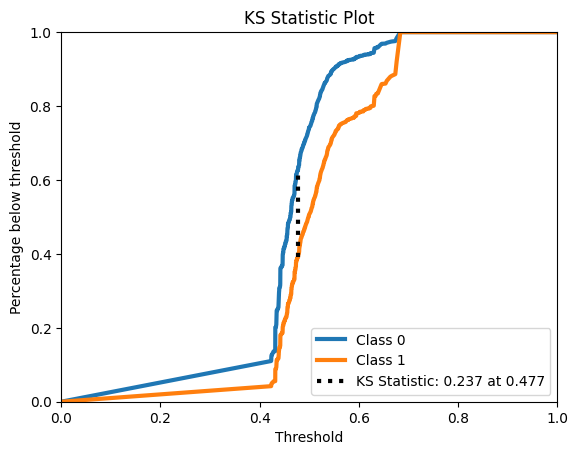


Accuracy:         0.5785
Recall:           0.4924
Precision:        0.7843
F1:               0.6050
AUROC:            0.6666
AUPR:             0.7870


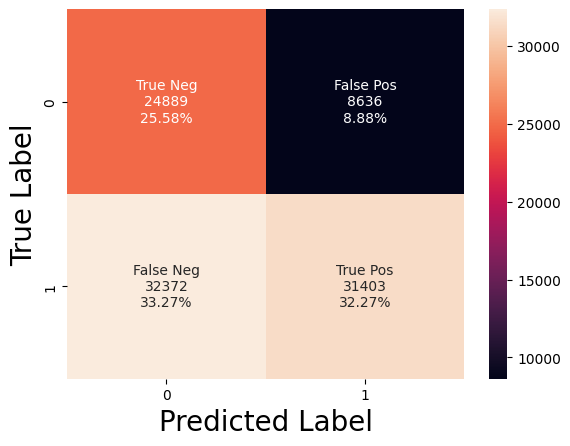

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=10)

model_file = GB_MODEL_PATH+"4"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento5

Model was already trained


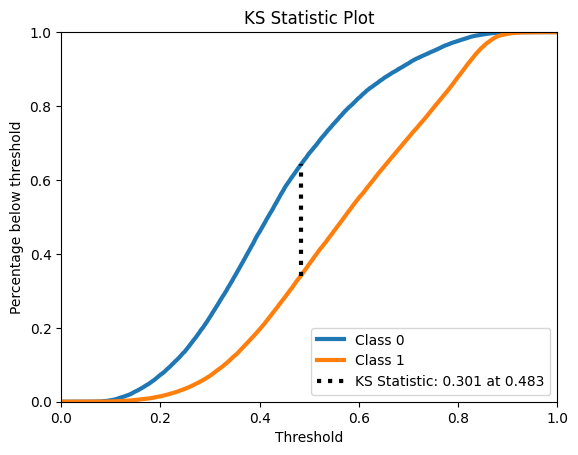


Accuracy:         0.6428
Recall:           0.6273
Precision:        0.7845
F1:               0.6972
AUROC:            0.7074
AUPR:             0.8122


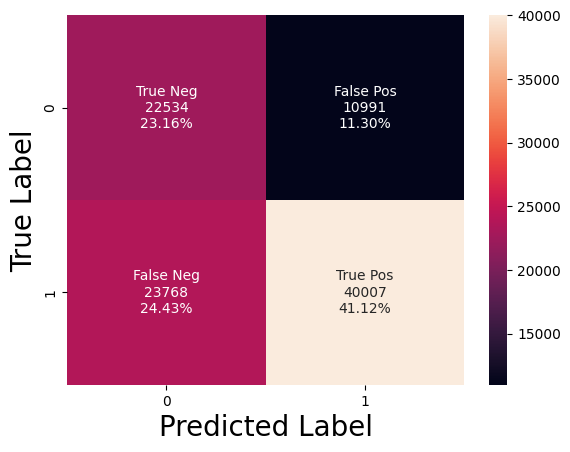

In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.5)

model_file = GB_MODEL_PATH+"5"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento6

Model was already trained


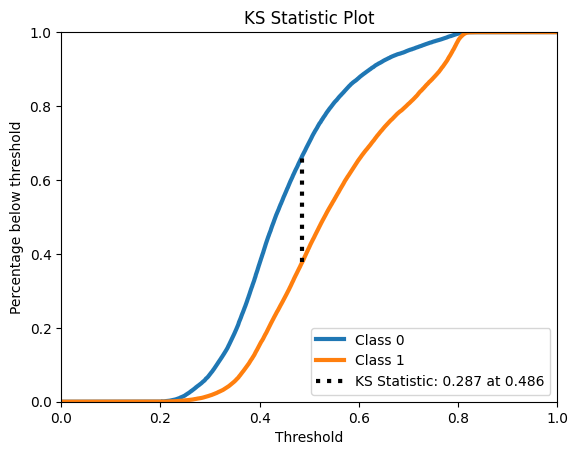


Accuracy:         0.6235
Recall:           0.5816
Precision:        0.7885
F1:               0.6694
AUROC:            0.6982
AUPR:             0.8056


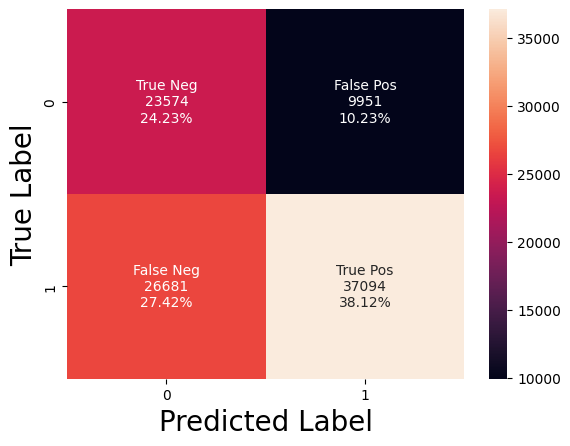

In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.05)  

model_file = GB_MODEL_PATH+"6"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

### Experimento7

Model was already trained


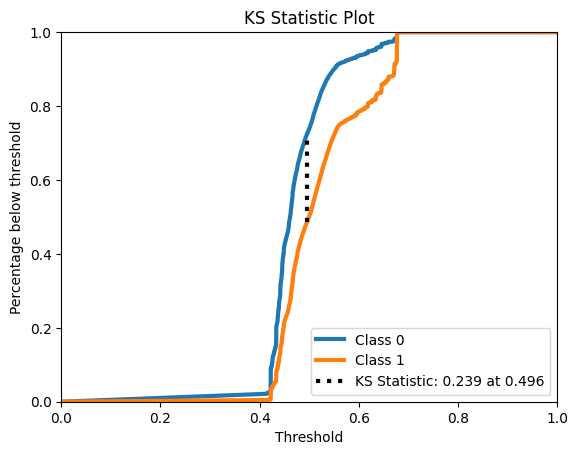


Accuracy:         0.5813
Recall:           0.4982
Precision:        0.7843
F1:               0.6093
AUROC:            0.6704
AUPR:             0.7891


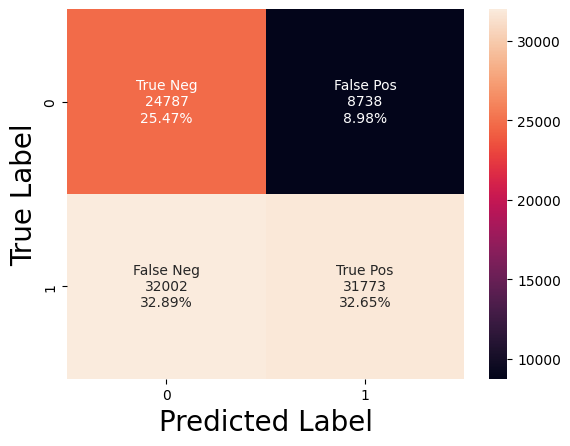

In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.01)  

model_file = GB_MODEL_PATH+"7"
if not exists(model_file):
    gb_clf.fit(x_train, y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(gb_clf,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        gb_clf = pickle.load(file)

gb_pred_class = gb_clf.predict(x_test)
gb_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, gb_pred_class, gb_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, gb_pred_class)

## Random Forest

In [5]:
# CP = f"{os.getcwd()}"
PATH = "Models/RF"
MODEL_FILE = f"{PATH}/model"

In [6]:
# MODELS_PATH = "drive/MyDrive/neural-networks/Models/RF"

# CP = f"{os.getcwd()}"
# PATH = os.path.join(CP, MODELS_PATH)
# MODEL_FILE = f"{PATH}/model"

### Experimento1

Vamos agora fazer a testagem com todos os parâmetros da RandomForestClassifier nos valores padrão.

Model was already trained


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


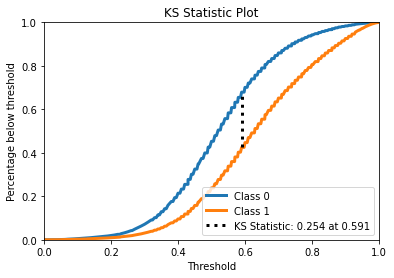


Accuracy:         0.6549
Recall:           0.7611
Precision:        0.7258
F1:               0.7430
AUROC:            0.6696
AUPR:             0.7871


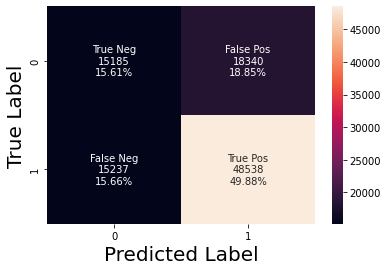

In [12]:
MODEL_FILE_C = MODEL_FILE + "1.pkl"

rf_clf = RandomForestClassifier()

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento2

O primeiro parâmetro que irá ser modificado é o parâmetro referente ao número de estimadores.

Model was already trained


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


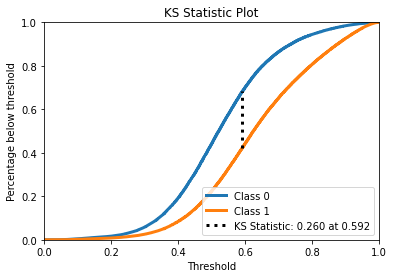


Accuracy:         0.6605
Recall:           0.7755
Precision:        0.7255
F1:               0.7497
AUROC:            0.6745
AUPR:             0.7916


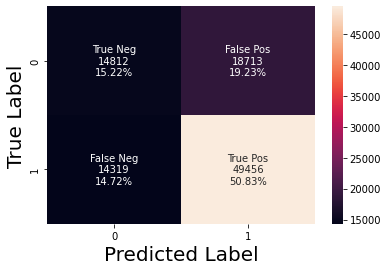

In [13]:
MODEL_FILE_C = MODEL_FILE + "2.pkl"

rf_clf = RandomForestClassifier(n_estimators=500)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento3

Model was already trained


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


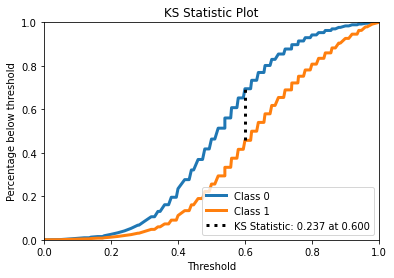


Accuracy:         0.6471
Recall:           0.7437
Precision:        0.7250
F1:               0.7342
AUROC:            0.6618
AUPR:             0.7802


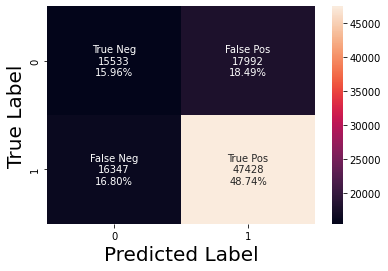

In [14]:
MODEL_FILE_C = MODEL_FILE + "3.pkl"

rf_clf = RandomForestClassifier(n_estimators=50)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento4

Model was already trained


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


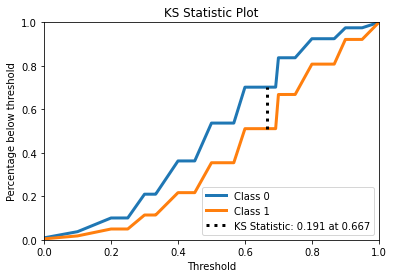


Accuracy:         0.6081
Recall:           0.6456
Precision:        0.7261
F1:               0.6835
AUROC:            0.6302
AUPR:             0.7473


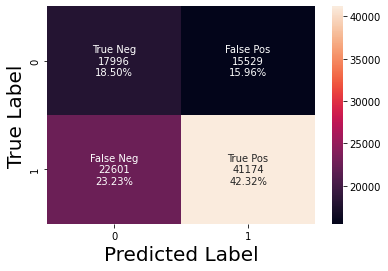

In [15]:
MODEL_FILE_C = MODEL_FILE + "4.pkl"

rf_clf = RandomForestClassifier(n_estimators=10)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento5

In [ ]:
MODEL_FILE_C = MODEL_FILE + "5.pkl"

rf_clf = RandomForestClassifier(n_estimators=1000)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

Model was already trained


### Experimento6

Model was already trained


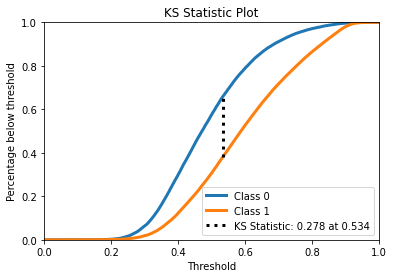


Accuracy:         0.6528
Recall:           0.6941
Precision:        0.7562
F1:               0.7238
AUROC:            0.6902
AUPR:             0.8032


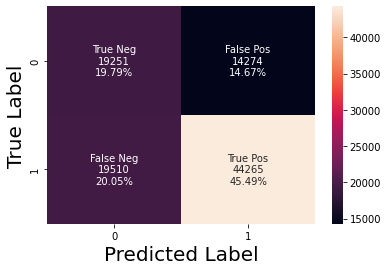

In [12]:
MODEL_FILE_C = MODEL_FILE + "6.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth= 20)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento7

Model was already trained


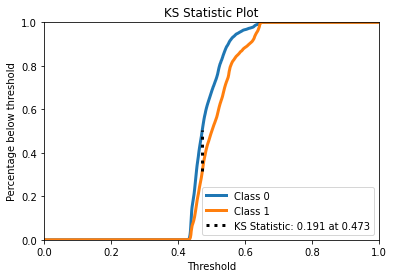


Accuracy:         0.5653
Recall:           0.5044
Precision:        0.7506
F1:               0.6034
AUROC:            0.6420
AUPR:             0.7680


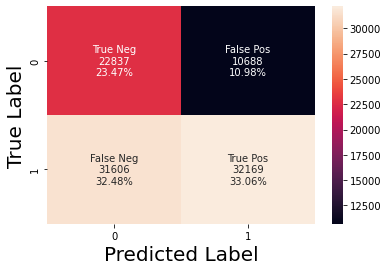

In [13]:
MODEL_FILE_C = MODEL_FILE + "7.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=2)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento8

Model was already trained


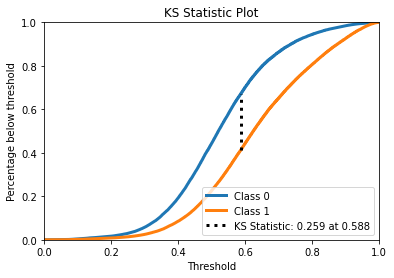


Accuracy:         0.6603
Recall:           0.7748
Precision:        0.7255
F1:               0.7494
AUROC:            0.6744
AUPR:             0.7922


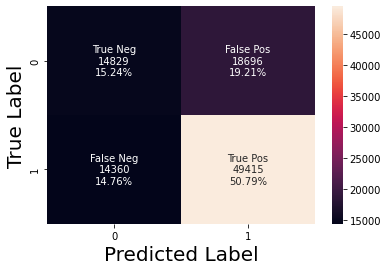

In [14]:
MODEL_FILE_C = MODEL_FILE + "8.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=40)

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento9

Variando agora o critério de divisão usando o melhor valor do número de estimadores e melhor profundidade máxima.

Model was already trained


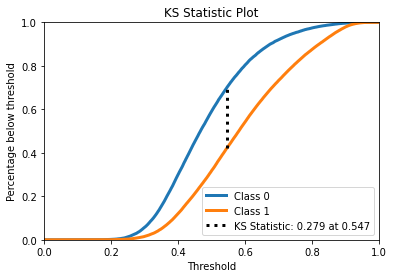


Accuracy:         0.6512
Recall:           0.6833
Precision:        0.7603
F1:               0.7197
AUROC:            0.6920
AUPR:             0.8040


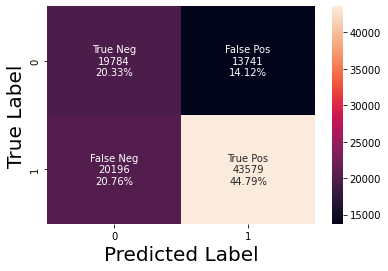

In [15]:
MODEL_FILE_C = MODEL_FILE + "9.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, criterion="entropy")

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento10

Model was already trained


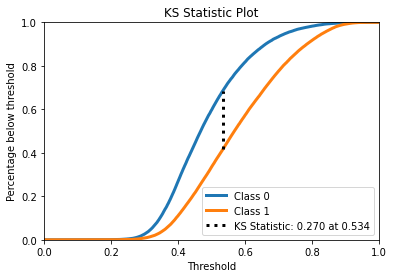


Accuracy:         0.6417
Recall:           0.6657
Precision:        0.7581
F1:               0.7089
AUROC:            0.6839
AUPR:             0.7976


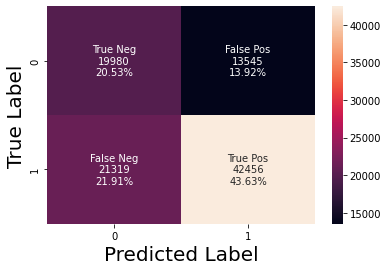

In [16]:
MODEL_FILE_C = MODEL_FILE + "10.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, criterion="entropy", max_features="log2")

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

### Experimento11

Model was already trained


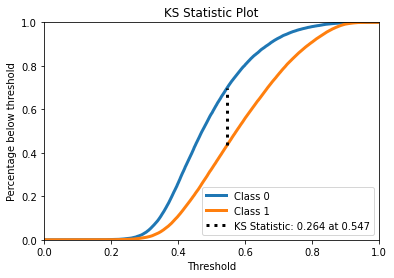


Accuracy:         0.6424
Recall:           0.6750
Precision:        0.7536
F1:               0.7122
AUROC:            0.6809
AUPR:             0.7958


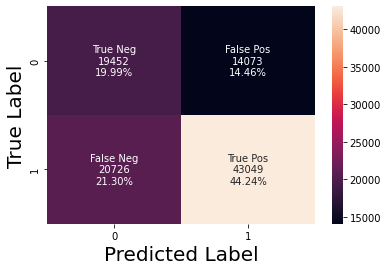

In [17]:
MODEL_FILE_C = MODEL_FILE + "11.pkl"

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, max_features="log2")

if not exists(MODEL_FILE_C):
    os.makedirs(PATH, exist_ok = True)
    rf_clf.fit(x_train, y_train)
    pickle.dump(rf_clf, open(MODEL_FILE_C, "wb"))
else:
    print("Model was already trained")
    
rf_clf = pickle.load(open(MODEL_FILE_C, "rb"))

rf_pred_class = rf_clf.predict(x_test)
rf_pred_scores = rf_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, rf_pred_class, rf_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test,rf_pred_class)

## Ensemble Misto

In [ ]:
MIX_ENS_PATH = "Models/MIX_ENS"
MIX_ENS_MODEL_PATH = f"{MIX_ENS_PATH}/model"

### Experimento1

Model was already trained


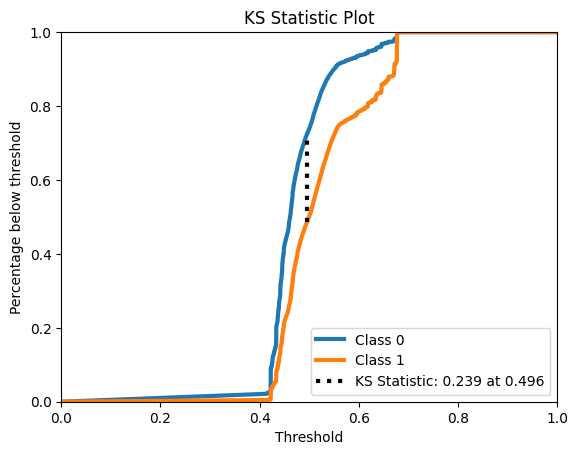


Accuracy:         0.5813
Recall:           0.4982
Precision:        0.7843
F1:               0.6093
AUROC:            0.6704
AUPR:             0.7891


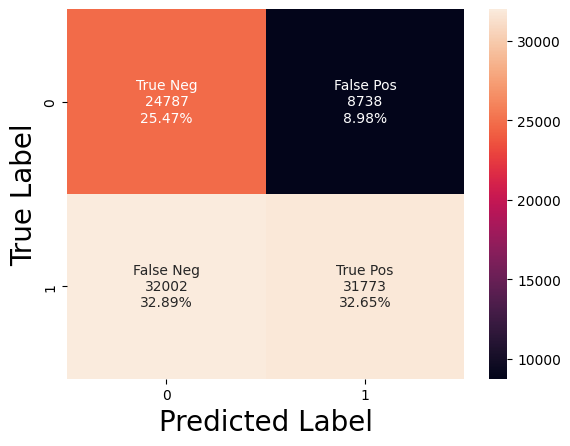

In [ ]:
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
rf = RandomForestClassifier()

model_file = MIX_ENS_MODEL_PATH+"1"
if not exists(model_file):
    mlp_ens = VotingClassifier([('gb', gb), ('mlp', mlp), ('rf', rf)], voting='soft')
    mlp_ens.fit(x_train,y_train)
    with open(model_file, 'wb') as file:
        pickle.dump(mlp_ens,file)
else:
    print("Model was already trained")
    with open(model_file, 'rb') as file:
        mlp_ens = pickle.load(file)



mlp_ens_pred_class = gb_clf.predict(x_test)
mlp_ens_pred_scores = gb_clf.predict_proba(x_test)
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, mlp_ens_pred_class, mlp_ens_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
metrics.plot_confusion_matrix(y_test, mlp_ens_pred_class)

## SVM

In [ ]:
def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

### Experimento 1


In [ ]:
MODELS_PATH = "Models/SVM"
HISTORY_PATH = f"{MODELS_PATH}/history"
MODEL_PATH = f"{MODELS_PATH}/model"

In [ ]:
history_file = HISTORY_PATH + "1.npy"
model_file = MODEL_PATH + "1"

classifier = SVC(C=1.0, kernel="rbf", probability=True)

if  not exists(model_file):
    svm_model = classifier.fit(x_train, y_train)
    outfile = open(model_file, "wb")
    pickle.dump(svm_model, outfile)
    outfile.close()
else:
    print("Model was already trained")
    infile = open(model_file,"rb")
    classifier = pickle.load(infile)
    infile.close()
    

In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict_proba(x_test)
y_pred_class = classifier.predict(x_test)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)



## Resumo dos resultados
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
print('Performance no conjunto de validação:')
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
